In [1]:
 # ======== ipynb settings =======
%load_ext autoreload
%autoreload 2

In [2]:
import IPython
from torchaudio import load
from src.utils import show_spec
import os
import numpy as np
from six.moves import cPickle as pickle


In [5]:
##may need to be executed 3 times at least, before working 
from src.enhancement import UDiffSE, fUDiffSE

In [6]:
ckpt_audio = "./checkpoints/aonly_tcd_speech_modeling_default_28M.ckpt"

ckpt_avhubert_light_28M = "./checkpoints/av_tcd_speech_modeling_concat_attn_masking_light_avhubert_p0_28M_enc_dec.ckpt"

In [7]:

clean_path = "./data_demo/clean_33F_si1313.wav"
noisy_path = "./data_demo/noisy_33F_si1313_SPSQUARE_5.wav"
v_path = "./data_demo/video_33F_si1313_mouthcrop.mp4"


In [8]:
num_E = 30  # Number of E-step iterations (reverse diffusion process)
verbose = True


udiffse_aonly = UDiffSE(ckpt_path=ckpt_audio, num_E=num_E, verbose=verbose)
fudiffse_aonly = fUDiffSE(ckpt_path=ckpt_audio, num_E=num_E, verbose=verbose)


udiffse_avhubert_light_28M = UDiffSE(ckpt_path=ckpt_avhubert_light_28M, num_E=num_E, verbose=verbose)
fudiffse_avhubert_light_28M = fUDiffSE(ckpt_path=ckpt_avhubert_light_28M, num_E=num_E, verbose=verbose)


##### launching model ######
##### finshing launching model ######
### ncsnpp audio_only False
Checkpoint: fine-tuned
##### launching model ######
### ncsnpp audio_only False
Checkpoint: fine-tuned
##### finshing launching model ######


#### Uncondionatal prior sampling

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.49it/s]

generated clean speech


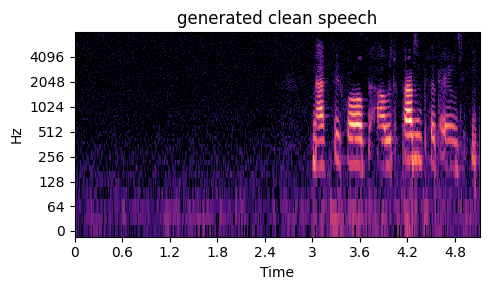

In [9]:
##might need to run warming.py on command line interface before

s_clean, S_clean = udiffse_aonly.prior_sampler(clean_file = None, vfile_path = None)

print("generated clean speech")
show_spec(spectogram=[S_clean], titles=["generated clean speech"])
IPython.display.display(IPython.display.Audio(s_clean, rate=16000))

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.50it/s]

generated clean speech


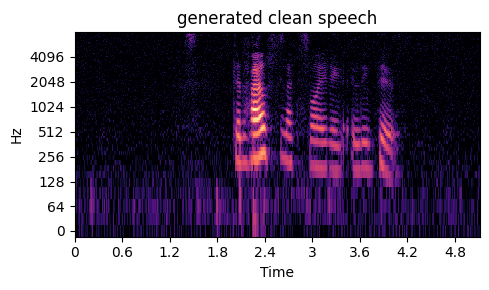

In [10]:
s_clean, S_clean = fudiffse_aonly.prior_sampler(clean_file = None, vfile_path = None)

print("generated clean speech")
show_spec(spectogram=[S_clean], titles=["generated clean speech"])
IPython.display.display(IPython.display.Audio(s_clean, rate=16000))

#### Prior sampling conditioned on lips video 

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.65it/s]

generated clean speech


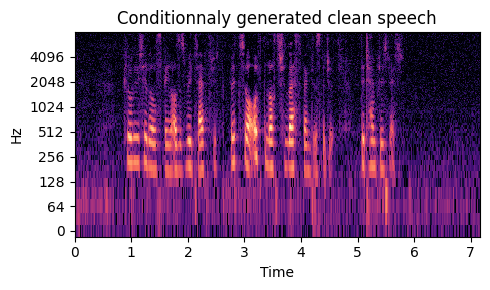

In [11]:
s_clean, S_clean = udiffse_avhubert_light_28M.prior_sampler(clean_file = clean_path, vfile_path = v_path)

print("generated clean speech")
show_spec(spectogram=[S_clean], titles=["Conditionnaly generated clean speech"])
IPython.display.display(IPython.display.Audio(s_clean, rate=16000))

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.62it/s]

generated clean speech


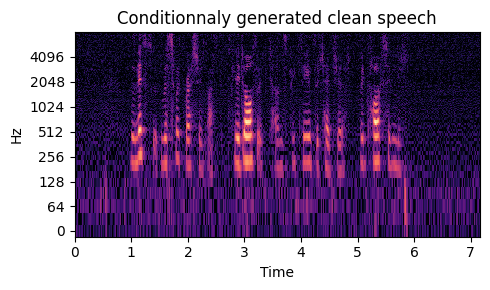

In [12]:
s_clean, S_clean = fudiffse_avhubert_light_28M.prior_sampler(clean_file = clean_path, vfile_path = v_path)

print("generated clean speech")
show_spec(spectogram=[S_clean], titles=["Conditionnaly generated clean speech"])
IPython.display.display(IPython.display.Audio(s_clean, rate=16000))

#### Speech Enhancement with UdiffSE/AV-UdiffSE and fUdiffSE/AV-fUdiffSE i.e. (UdiffSE+/AV-UdiffSE+)

In [13]:
def show_spec_play_audio(method, s_est, S_est) :

    show_spec(
    spectogram=[method.S_ref, method.X.mean(0), S_est],
    titles=["Clean", "Noisy", "Estimate"],
    )

    print("Clean speech")
    IPython.display.display(IPython.display.Audio(method.s_ref, rate=16000))
    print("Noisy speech")
    IPython.display.display(IPython.display.Audio(method.x, rate=16000))
    print("Estimated speech")
    IPython.display.display(IPython.display.Audio(s_est, rate=16000))

Input PESQ: 2.8829 --- SI-SDR: 4.9694 --- ESTOI: 0.7542 --- SI-SIR: 5.0664 ---SI-SAR: 42.8782


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:14<00:00,  2.13it/s]


1/5 PESQ: 2.2443 --- SI-SDR: 2.1409 --- ESTOI: 0.3510 --- SI-SIR: 16.4125 ---SI-SAR: 2.3205


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:14<00:00,  2.14it/s]


2/5 PESQ: 2.3883 --- SI-SDR: 3.7985 --- ESTOI: 0.6296 --- SI-SIR: 18.7258 ---SI-SAR: 3.9561


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:14<00:00,  2.13it/s]


3/5 PESQ: 3.0077 --- SI-SDR: 8.9078 --- ESTOI: 0.7283 --- SI-SIR: 17.4586 ---SI-SAR: 9.6271


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:14<00:00,  2.13it/s]


4/5 PESQ: 3.0773 --- SI-SDR: 10.4132 --- ESTOI: 0.7698 --- SI-SIR: 16.1887 ---SI-SAR: 11.8753


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:14<00:00,  2.13it/s]


5/5 PESQ: 3.1113 --- SI-SDR: 10.6714 --- ESTOI: 0.7947 --- SI-SIR: 14.3816 ---SI-SAR: 13.2952
Clean speech


Noisy speech


Estimated speech


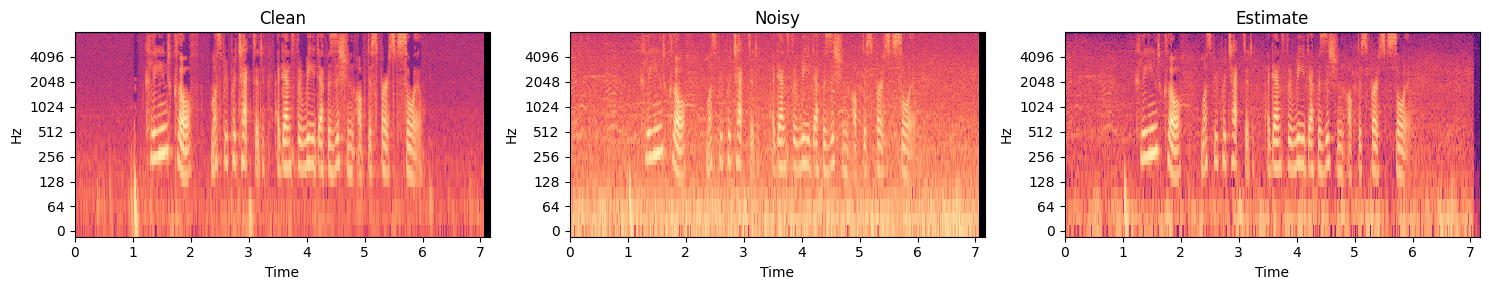

In [14]:
# Run speech enhancement
s_est, S_est = udiffse_aonly.run(
    mix_file=noisy_path,
    clean_file=clean_path,
    video_file = None,
    num_EM=5,
    nbatch=4,
    nmf_rank=4,
    startstep=0,
)

# Show spectrograms and play audio
show_spec_play_audio(udiffse_aonly, s_est, S_est)


Input PESQ: 2.8829 --- SI-SDR: 4.9694 --- ESTOI: 0.7542 --- SI-SIR: 5.0664 --- SI-SAR: 42.8782


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:38<00:00,  1.30s/it]


Output PESQ: 3.2509 --- SI-SDR: 9.5283 --- ESTOI: 0.7710 --- SI-SIR: 18.4437 --- SI-SAR: 10.1924
Clean speech


Noisy speech


Estimated speech


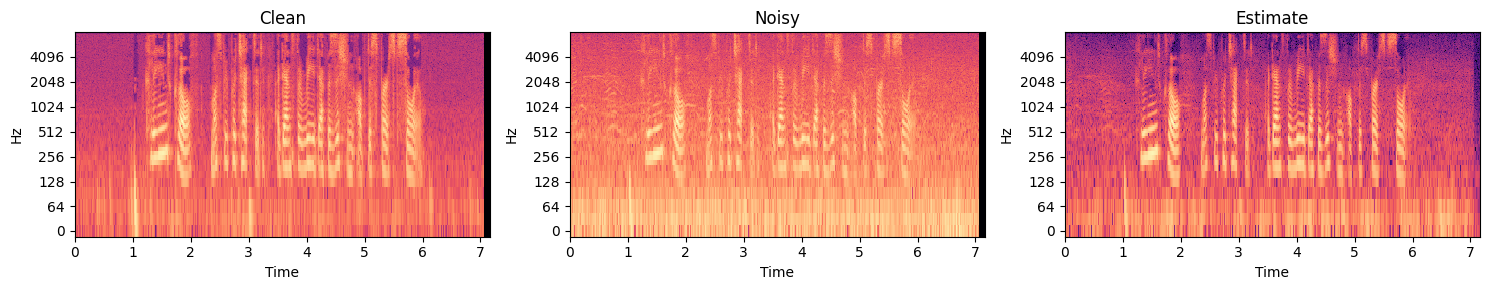

In [15]:
# Run speech enhancement
s_est, S_est = fudiffse_aonly.run(
    mix_file=noisy_path,
    clean_file=clean_path,
    video_file = None,
    num_EM=1,
    nbatch=8,
    nmf_rank=4,
    startstep=0,
    # supp_update = True
)

# Show spectrograms and play audio
show_spec_play_audio(fudiffse_aonly, s_est, S_est)


Input PESQ: 2.8829 --- SI-SDR: 4.9694 --- ESTOI: 0.7542 --- SI-SIR: 5.0664 ---SI-SAR: 42.8782


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:46<00:00,  1.55s/it]


1/5 PESQ: 2.2017 --- SI-SDR: 1.9480 --- ESTOI: 0.3984 --- SI-SIR: 29.6403 ---SI-SAR: 1.9582


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:46<00:00,  1.56s/it]


2/5 PESQ: 2.6760 --- SI-SDR: 5.9816 --- ESTOI: 0.7141 --- SI-SIR: 31.4772 ---SI-SAR: 5.9996


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:46<00:00,  1.56s/it]


3/5 PESQ: 3.0581 --- SI-SDR: 10.6283 --- ESTOI: 0.7687 --- SI-SIR: 29.0850 ---SI-SAR: 10.7132


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:48<00:00,  1.60s/it]


4/5 PESQ: 3.1495 --- SI-SDR: 12.4697 --- ESTOI: 0.7953 --- SI-SIR: 26.6876 ---SI-SAR: 12.6837


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:48<00:00,  1.61s/it]


5/5 PESQ: 3.2003 --- SI-SDR: 13.4122 --- ESTOI: 0.8199 --- SI-SIR: 26.3625 ---SI-SAR: 13.6989
Clean speech


Noisy speech


Estimated speech


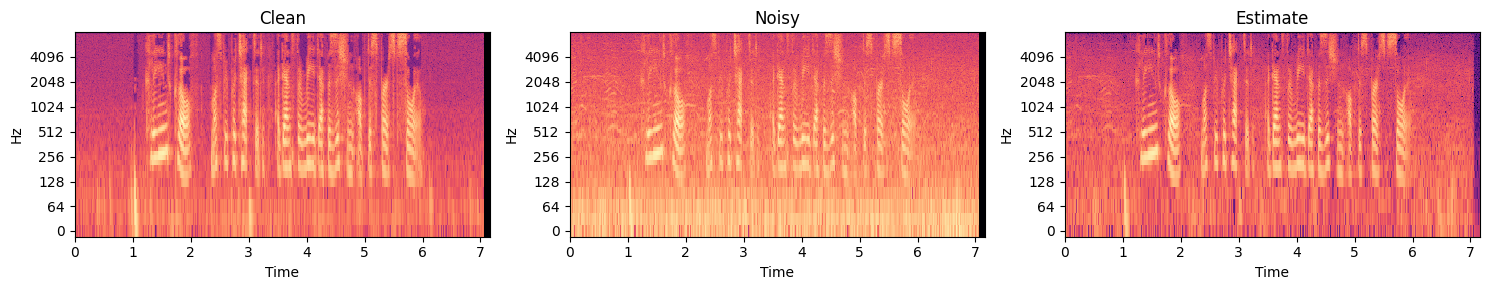

In [16]:
# Run speech enhancement
s_est, S_est = udiffse_avhubert_light_28M.run(
    mix_file=noisy_path,
    clean_file=clean_path,
    video_file = v_path,
    num_EM=5,
    nbatch=8,
    nmf_rank=4,
    startstep=0,
)

# Show spectrograms and play audio
show_spec_play_audio(udiffse_avhubert_light_28M, s_est, S_est)


Input PESQ: 2.8829 --- SI-SDR: 4.9694 --- ESTOI: 0.7542 --- SI-SIR: 5.0664 --- SI-SAR: 42.8782


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:47<00:00,  1.58s/it]


Output PESQ: 3.2857 --- SI-SDR: 9.8024 --- ESTOI: 0.7920 --- SI-SIR: 34.6220 --- SI-SAR: 9.8264
Clean speech


Noisy speech


Estimated speech


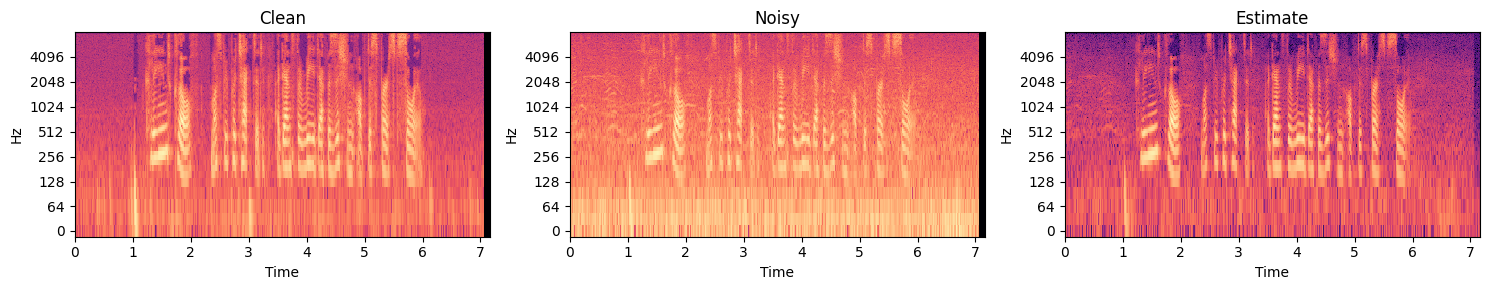

In [17]:
# Run speech enhancement
s_est, S_est = fudiffse_avhubert_light_28M.run(
    mix_file=noisy_path,
    clean_file=clean_path,
    video_file = v_path,
    num_EM=1,
    nbatch=8,
    nmf_rank=4,
    startstep=0,
)

# Show spectrograms and play audio
show_spec_play_audio(fudiffse_avhubert_light_28M, s_est, S_est)
